### Uploading Phase

In [2]:
# First and foremost, we import pandas.
import pandas as pd

# Next, we import the data from the file inside the folder next to this one.
path = "../Data/Telco_Customer_Churn.csv"
df = pd.read_csv(path)

# Now we confirm if the data upload worked properly.
df.head()

# We must see the DataFrame status:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cleansing Phase

In [ ]:
# We can appreciate that there are no nulls. Suspicious...
# We can see as well that there are some columns in lowercase among the others. 
# This might be optional, but I want them to look orderly.
df.rename(columns = {"customerID": "CustomerID", "gender": "Gender", "tenure" : "Tenure"}, inplace = True)
df.info()

# The column TotalCharges is type object. Let's format it into float.
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
# An error occurred. Let's see what happened.
df["TotalCharges"].value_counts() # 11 counted as " ".

# Let's find entries without a ".".
df[~df["TotalCharges"].str.contains(r"\.")] # 335 rows with int numbers mixed in them.

# Let's see if by turning the spaces into zeroes, we can turn the column into a numeric.
df.loc[df["TotalCharges"].str.contains(" "), ["TotalCharges"]] = "0"
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

# Now that the DataFrame looks better, we can look for duplicates.
df[df.duplicated()] # No duplicates.

# Let's look for anomalous data:
df["Gender"].value_counts() # There are only two genders, but it's better leaving it as it is
df["SeniorCitizen"].value_counts() # It may count as a boolean column: 0-1
df["Partner"].value_counts() # This one might count as boolean as well: Yes/No
df["Dependents"].value_counts() # This one as well: Yes/No
df["PhoneService"].value_counts() # Boolean: Yes/No
df["MultipleLines"].value_counts() # This one has three categories, so it stays as object: No/Yes/No phone service
df["InternetService"].value_counts() # Options: Fiber optic / DSL / No
df["OnlineSecurity"].value_counts() # Thee options: No / Yes / No internet service
df["OnlineBackup"].value_counts() # Three options: No / Yes / No internet service
df["DeviceProtection"].value_counts() # Three options: No / Yes / No internet service
df["TechSupport"].value_counts() # Three options: No / Yes / No internet service
df["StreamingTV"].value_counts() # Three options: No / Yes / No internet service
df["StreamingMovies"].value_counts() # Three options: No / Yes / No internet service
df["Contract"].value_counts() # Three options: Monto to month / Two year / One year
df["PaperlessBilling"].value_counts() # Boolean: Yes / No
df["PaymentMethod"].value_counts() # Four options: Mailed check / Electronic check / Bank transfer (automatic) / Credit card (sutomatic)
df["Churn"].value_counts() # Boolean

# Before the transformation, I want to make sure no spaces escape me.
columns = ["Gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "Contract", "PaperlessBilling",
            "PaymentMethod",  "Churn", "StreamingMovies"]

blank_list = []
for column in columns:
    blanks = df[column].isin([" ", ""]).sum()
    blank_list.append(f"Column {column} has {blanks} blanks.")

print(blank_list)

# There are no blanks, so we can proceed.
# Next step: Turning binary columns into booleans
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool)
df["Partner"] = df["Partner"] == "Yes"
df["Dependents"] = df["Dependents"] == "Yes"
df["PhoneService"] = df["PhoneService"] == "Yes"
df["PaperlessBilling"] = df["PaperlessBilling"] == "Yes"
df["Churn"] = df["Churn"] == "Yes"

# We check on the DataFrame info now:
df.info()

# "Tenure", "MonthlyCharges" and "TotalCharges" are numeric, so we have to use describe() to find any anomalies.
df.describe()

# Now, we must fill those previous zeroes by looking at the data and finding a logic worth applying.
df[["Tenure", "MonthlyCharges", "Contract", "TotalCharges"]]

# By the look of it, to fill our zeroes, we must multiply the tenure by the monthly charges to get the total charges...
# Let's see if thats the case by making a temporary column.
df["TempTotalCharges"] =  df["Tenure"] * df["MonthlyCharges"]
df[["Tenure", "MonthlyCharges", "Contract", "TotalCharges","TempTotalCharges"]].tail(20)

# Let's deletethe comparative column
df.drop("TempTotalCharges", axis = 1, inplace = True)

# We can see that the real values get close to what we want to achieve, although it's not perfect...
# It's probable that; whether some clients have a few discounts or additional fees we can't know about, 
# or the company is getting extra money, unbeknownst to their clients, behind their backs.
# Either way, let's get the info from those columns.
df.loc[df["TotalCharges"] == 0]

# Tenure means how many months clients have subscribed to the company's services.
# By looking at this rows, we can see they are new to this contract, so they still don't have any charges
# to pay. That's why they were blank in the first place.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,0.0,False
753,3115-CZMZD,Male,False,False,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,0.0,False
936,5709-LVOEQ,Female,False,True,True,0,True,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,0.0,False
1082,4367-NUYAO,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,0.0,False
1340,1371-DWPAZ,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,0.0,False
3331,7644-OMVMY,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,0.0,False
3826,3213-VVOLG,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,0.0,False
4380,2520-SGTTA,Female,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,0.0,False
5218,2923-ARZLG,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,0.0,False
6670,4075-WKNIU,Female,False,True,True,0,True,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,0.0,False


### Interpretation Phase

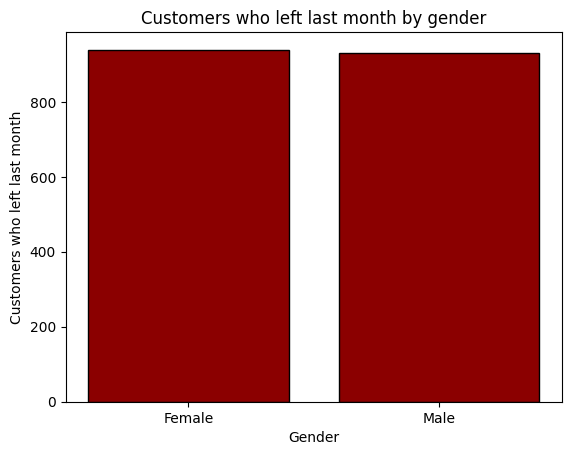

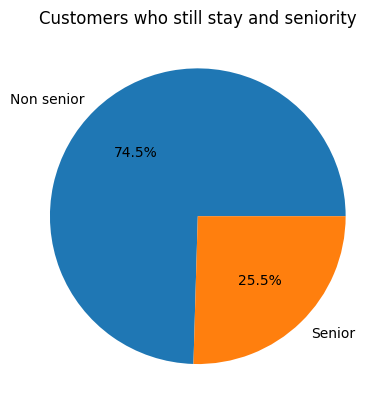

In [4]:
# Import matplotlib library to interpret cleansed data, and numpy to format data from DataFrame
import matplotlib.pyplot as plt
import numpy as np


# We must gather relevant info: This Dataset has been gathered to know about clients 
# who have left last month and those who haven't yet.
# Let's see if the content available appealing to different genders has to do with this.
# Here we get the genders and the sum of plople who left by gender.
gender = [df["Gender"].unique()]
fil_churn_by_gender = df[df["Churn"] == True][["Gender", "Churn"]]

# In this part, we format the data for the graph.
leaving_clients_last_month = fil_churn_by_gender.groupby("Gender")["Churn"].sum().values
leaving_clients_last_month = leaving_clients_last_month.tolist()
gender = gender[0].tolist()

# Then, we make the graph: Adding the labels and title, then showing it.
plt.bar(gender, leaving_clients_last_month, color = "darkred", ec = "black")
plt.xlabel("Gender")
plt.ylabel("Customers who left last month")
plt.title("Customers who left last month by gender")

plt.show()

# Let's make another one to compare if among the people who stlll stays with the company's services 
# are whether senior or not
seniority = ["Non senior", "Senior" ]
fil_churn_by_seniority = df[df["Churn"] == True][["SeniorCitizen", "Churn"]]

# We format the data for the graph. (Seniors = 476, Non seniors = 1393)
people_staying = fil_churn_by_seniority.groupby("SeniorCitizen")["Churn"].sum().values


# Then, we make the graph: This time apie chart
plt.pie(people_staying, labels = seniority, autopct = "%.1f%%")
plt.title("Customers who still stay and seniority")

plt.show()


By looking at the graphs, we can see there's barely any difference between genders when leaving, 
but we can see that almost three quarters of people who pays for this services are not senior citizens

c:\Users\the_u\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


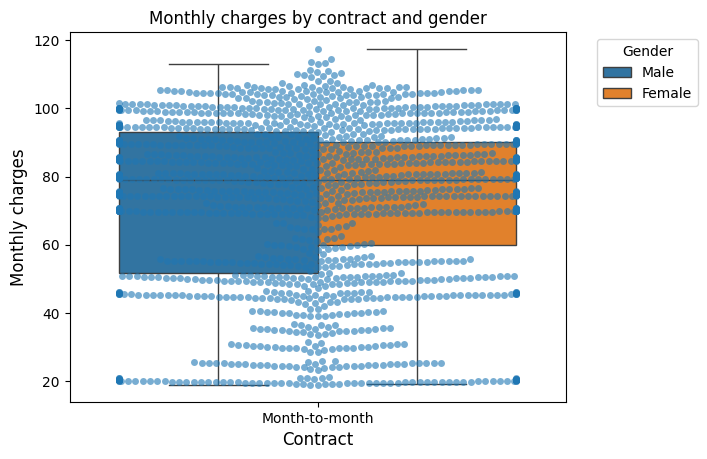

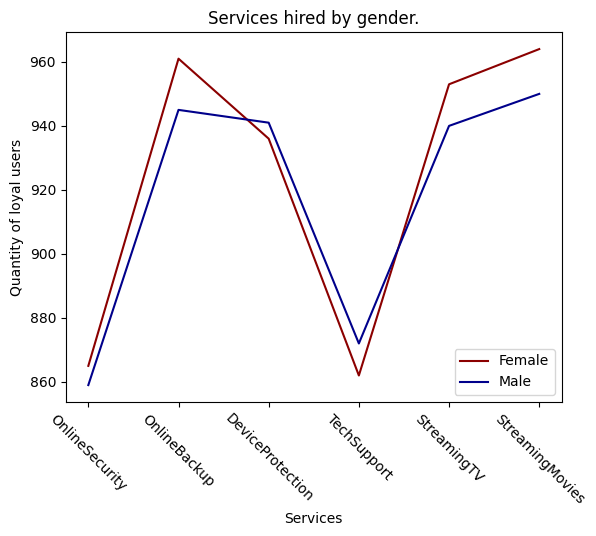

In [38]:
# Complex graphs: Let's import seaborn for more complex graphics.
import seaborn as sns

# Let's see total charges by gender at the clients who still stay and have a Month-by-month contract.
df_staying = df[df["Churn"] == True][["Gender", "Contract", "MonthlyCharges"]]
df_staying = df_staying[df_staying["Contract"]  == "Month-to-month"]

sns.swarmplot(data = df_staying, x="Contract", y="MonthlyCharges", alpha=0.6)
sns.boxplot(data = df_staying, x="Contract", y="MonthlyCharges", hue="Gender")
plt.title("Monthly charges by contract and gender")
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Monthly charges", fontsize=12)
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# To end this, lets see how many services are requested by gender, between those who are still clients and
# have internet service:
services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
statistics= [[], []]

# Filtering data for people who stays.
df_services = df[df["Churn"] == False][["Gender", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
                                        "StreamingTV", "StreamingMovies"]]

# Getting totals by genders.
for service in services:

    df_service = df_services[df_services[service] == "Yes"]
    df_service = df_service[["Gender", service]]
    values = df_service.groupby("Gender")[service].count().values
    values = values.tolist()
    statistics[0].append(values[0])
    statistics[1].append(values[1])

# Assigning to each gender
services_male = statistics[1]
services_female = statistics[0]

# Define plot graph
plt.plot(services, services_female, color = "darkred")
plt.plot(services, services_male, color = "darkblue")
plt.title("Services hired by gender.")
plt.xlabel("Services")
plt.ylabel("Quantity of loyal users")
plt.legend(["Female", "Male"])
plt.xticks(rotation=315)
plt.show()



To conclude with these last graphics, we can tell that men have a more varied range of monthly charges than women, even though are women who contract services from the company the most, especially online backup.
Men: $45 - $92
Women: $60 - $88

Women are more likely as well to pay for streaming movies and streaming tv than men.
Men are more likely than women to hire tech support and slightly device protecion just a bit more.